In [81]:
import pandas as pd
url = 'https://drive.google.com/file/d/1sWLTHiB5UHHsyIB5hSuIXuBPdiTtnilS/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
A = pd.read_csv(path)


url = 'https://drive.google.com/file/d/1VvcSIqzUILoYFknLNyMrP_DbB_pBA7fW/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
B = pd.read_csv(path)


url = 'https://drive.google.com/file/d/1yFrOqq0-Ya_CSl4cxsr4DLfWdh3qHEBb/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
C = pd.read_csv(path)


url = 'https://drive.google.com/file/d/184TLq_TuWP8U2vLlPNp31UjzE6TsMUkk/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
D = pd.read_csv(path)


In [82]:
A.head()



,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,269,True,Homepage Version A - white SHOP NOW • http...
1,25,div,mySidebar,309,True,created 2021-09-14 • 14 days 0 hours 34 mi...
2,4,a,Mac,279,True,NaN
3,69,a,iPhone,246,True,NaN
4,105,a,Accessories,1235,True,NaN


In [83]:
B.head()


,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,236,True,Homepage Version B - red SHOP NOW • https:...
1,25,div,mySidebar,304,True,created 2021-10-27 • 14 days 0 hours 34 mi...
2,4,a,Mac,268,True,NaN
3,69,a,iPhone,260,True,NaN
4,105,a,Accessories,1214,True,NaN


In [84]:
C.head()


,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,288,True,Homepage Version C - white SEE DEALS • htt...
1,25,div,mySidebar,283,True,created 2021-10-27 • 14 days 0 hours 34 mi...
2,4,a,Mac,262,True,NaN
3,69,a,iPhone,234,True,NaN
4,105,a,Accessories,1288,True,NaN


In [85]:
D.head()

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,285,True,Homepage Version D - red SEE DEALS • https...
1,25,div,mySidebar,305,True,created 2021-10-27 • 14 days 0 hours 34 mi...
2,4,a,Mac,274,True,NaN
3,69,a,iPhone,243,True,NaN
4,105,a,Accessories,1267,True,NaN


In [86]:
# STEP 1:  Select only the row for the main button (SHOP NOW / SEE DEALS)
# because A/B testing focuses only on clicks for this specific button,
# not on other elements of the page.

dfs = {"A": A, "B": B, "C": C, "D": D}

clicks = {}

for name, df in dfs.items():
    clicks[name] = int(
        df[df["Name"].str.contains("SHOP NOW|SEE DEALS", case=False, na=False)]
        ["No. clicks"]
        .values[0]
    )

clicks


# def get_button_clicks(df):
#     row = df[df["Name"].str.contains("SHOP NOW|SEE DEALS", case=False, na=False)]
#     return int(row["No. clicks"].values[0])




{'A': 512, 'B': 281, 'C': 527, 'D': 193}

# Step 2: CTR

In [87]:
# Step 2 — Total number of visits (given in the LMS)

data = {
    "Version": ["A", "B", "C", "D"],
    "Click": [512, 281, 527, 193],
    "NoClick": [24814, 24466, 24349, 25040],
}

df = pd.DataFrame(data)
df["CTR"] = df["Click"] / (df["Click"] + df["NoClick"])
df


,Version,Click,NoClick,CTR
0,A,512,24814,0.020216
1,B,281,24466,0.011355
2,C,527,24349,0.021185
3,D,193,25040,0.007649


# Step 3 —Plot CTR

Text(0.5, 1.0, 'CTR Comparison Across A/B Test Versions')

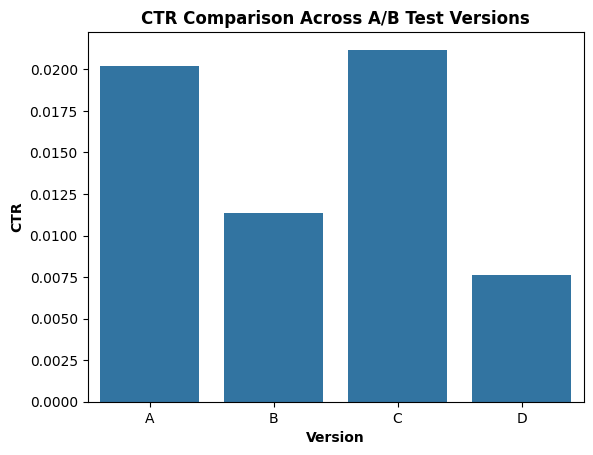

In [88]:
# Step 3 —plot CTR
import seaborn as sns

ax = sns.barplot(data=df, x="Version", y="CTR")
ax.set_xlabel("Version", fontweight="bold")
ax.set_ylabel("CTR", fontweight="bold")
ax.set_title("CTR Comparison Across A/B Test Versions", fontweight="bold")

#Result
I can visually see differences in CTR between versions, but I cannot conclude that these differences are statistically significant.

# Step 4 — Chi-Square Test

In [89]:
# Step 4 — Chi-Square Test

from scipy.stats import chi2_contingency

# Null (H0): All versions have the same CTR.
# Alternative (H1): At least one version has a different CTR.

contingency = [
    df["Click"].values,
    df["NoClick"].values
]

chi2, p, dof, expected = chi2_contingency(contingency)
p

if p < 0.05:
    print("p =", p, "→ The difference is statistically significant.")
else:
    print("p =", p, "→ No statistically significant difference.")


p = 2.7161216607868712e-48 → The difference is statistically significant.


#Step 5: Post-Hoc with Bonferroni
After the Chi-Square test showed there is a difference, I compared the versions two by two and used Bonferroni correction to make sure the result is not due to chance from doing many comparisons.

In [90]:
# Step 5 — Post-Hoc with Bonferroni

from scipy.stats import chi2_contingency

alpha = 0.05 / 6  # Bonferroni correction (4 versions → 6 comparisons)

def compare(v1, v2):
    sub = [
        [df.loc[v1, "Click"], df.loc[v2, "Click"]],
        [df.loc[v1, "NoClick"], df.loc[v2, "NoClick"]],
    ]

    chi2, p, _, _ = chi2_contingency(sub)

    if p < alpha:
        print(df.loc[v1, "Version"], "vs", df.loc[v2, "Version"], "→ Significant (p =", p, ")")
    else:
        print(df.loc[v1, "Version"], "vs", df.loc[v2, "Version"], "→ Not significant (p =", p, ")")


compare(0, 1)
compare(0, 2)
compare(0, 3)
compare(1, 2)
compare(1, 3)
compare(2, 3)



A vs B → Significant (p = 2.6730880539675666e-15 )
A vs C → Not significant (p = 0.464842123017306 )
A vs D → Significant (p = 3.0808983951735623e-33 )
B vs C → Significant (p = 6.955480170773988e-18 )
B vs D → Significant (p = 2.3573374085176145e-05 )
C vs D → Significant (p = 6.450501398841206e-37 )


# Step 5
CTR only tells us how many users click the button.
But clicking is not the final goal.

Drop-off rate shows how many users leave the process after clicking.
A lower drop-off means users continue their path.

Homepage-return rate shows how many users come back because
they did not find what they expected after clicking.

These metrics help understand user behavior after the click,
not just the click itself.

This is why I include them in the decision, not CTR alone.

# Step 6: Drop-off and return rate values

In [91]:
# Step 6 —Drop-off and return rate values are approximated from the charts
# provided in the exercise. Exact numbers are not given intentionally.
# The purpose is to interpret user behavior from visual reports,
# as often happens in real-world product analytics.

extra = pd.DataFrame({
    "Version": ["A", "C", "D"],
    "DropOff": [62, 71, 69],
    "ReturnRate": [5.3, 4.7, 2.6]
})

df = df.merge(extra, on="Version", how="left")
df


,Version,Click,NoClick,CTR,DropOff,ReturnRate
0,A,512,24814,0.020216,62.0,5.3
1,B,281,24466,0.011355,NaN,NaN
2,C,527,24349,0.021185,71.0,4.7
3,D,193,25040,0.007649,69.0,2.6


# Result

From the post-hoc test:

Version A and Version C are not statistically different in CTR.

This means C is not truly better than A, even though it has the highest CTR.

When I include user behavior after the click:

Version C has the highest drop-off rate → many users leave after clicking.

Version A has the lowest drop-off rate → users continue the process.

Version D has the lowest return rate but very low CTR.

So, although Version C attracts many clicks, users do not continue their journey.

Version A keeps users engaged after the click.

#Final conclusion

Version A is the real winner because it provides a more reliable user journey, not just more clicks.

| Version | Button Color | Button Text   |
| ------- | ------------ | ------------- |
| **A**   | White        | **SHOP NOW**  |
| **B**   | Red          | **SHOP NOW**  |
| **C**   | White        | **SEE DEALS** |
| **D**   | Red          | **SEE DEALS** |
